###### Introduction to Network Analysis 2023/24 (viii)

## Blockmodeling & stochastic block models, $k$-core decomposition

Browse [CDlib](https://cdlib.readthedocs.io/en/latest/), [NetworkX](https://networkx.org/documentation/stable/reference/algorithms/community.html), [graph-tool](https://graph-tool.skewed.de/static/doc/demos/inference/inference.html) or other library for implementations of network community detection and graph partitioning algorithms. Select an algorithm which you will be using in the exercises below. For instance, select one of most popular algorithms such as hierarchical optimization of modularity known as Louvain algorithm, map equation algorithm called Infomap, simple label propagation algorithm, hierarchical clustering based on edge betweenness, Markov clustering algorithm, (degree-corrected) stochastic block model etc.

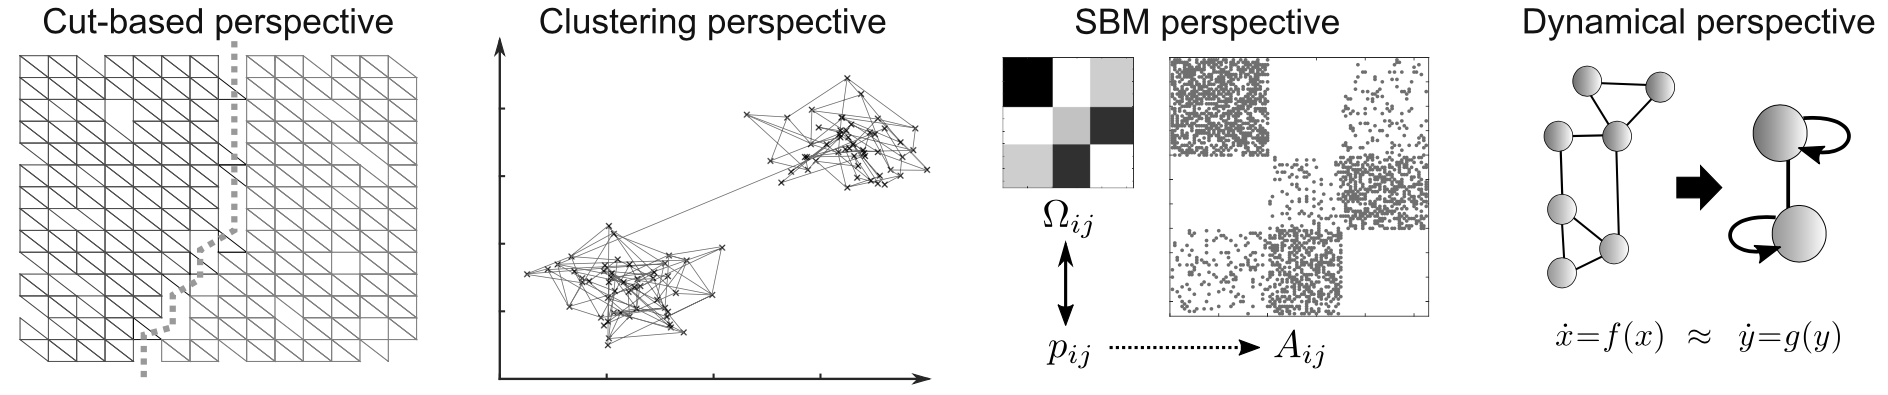

### I. Blockmodeling of small social networks

You are given two small social networks with known sociological partitioning of nodes.

+ Zachary karate club network with 2 groups ([karate_club.net](http://lovro.fri.uni-lj.si/ina/nets/karate_club.net))
+ Davis southern women network with 3 groups ([southern_women.net](http://lovro.fri.uni-lj.si/ina/nets/southern_women.net))



1. **(code)** Apply the (degree-corrected) stochastic block model to small social networks and test whether the revealed clusters coincide with sociological partitioning of these networks. You should apply the algorithm to each network multiple times and compare partitions using some standard measure. Since these networks are very small, you can also print out or visualize the results. What type of structure does the algorithm reveal in these networks?

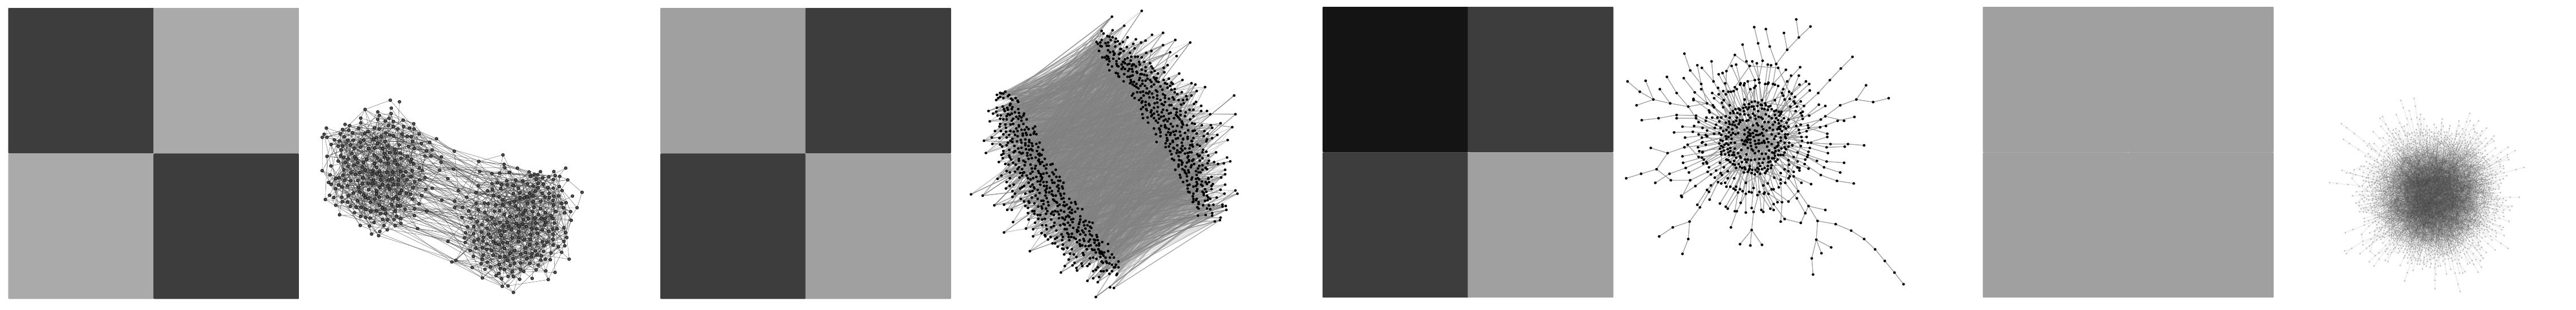

In [ ]:
#$(brew --prefix python@3.10)/bin/python3
import utils

soc_nets = [utils.read_pajek(name) for name in ["karate_club", "southern_women"]]

In [ ]:
from cdlib import algorithms

# see https://cdlib.readthedocs.io/en/latest/reference/cd_algorithms/node_clustering.html
algs = {"Known": lambda G: utils.known_clustering(G), "Louvain": algorithms.louvain,
        "Leiden": algorithms.leiden, "LPA": algorithms.label_propagation, "FLPA": utils.fast_label_propagation,
        "DCSBM": algorithms.sbm_dl # func. etymology: Stochastic Block Model minimizing Description Length
        }

# NOTE: this wasn't properly tested, as cdlib is a nightmare to install.
for G in soc_nets:
  utils.info(G)
  utils.CD_comparison(G, algs, runs = 100)

**NOTE**: below is a copy-pasted log file (formatted by GPT3)

|    Graph    | 'karate_club' |
| :---------: | :-----------: |
|    Nodes    |    34 (0)     |
|    Edges    |    78 (0)     |
|   Degree    |   4.59 (17)   |
|     LCC     |  100.0% (1)   |
|  Clustering |    0.5706     |

<br>

|  Algorithm  | Count |     Q     |    NMI    |    ARI    |    VI     |
| :---------: | :---: | :-------: | :-------: | :-------: | :-------: |
|   'Known'   |   2   |   0.371   |   1.000   |   1.000   |   0.000   |
|  'Louvain'  |   4   |   0.416   |   0.632   |   0.513   |   1.060   |
|  'Leiden'   |   4   |   0.420   |   0.687   |   0.541   |   0.908   |
|    'LPA'    |   3   |   0.325   |   0.445   |   0.473   |   1.299   |
|   'FLPA'    |   3   |   0.346   |   0.689   |   0.681   |   0.657   |
|    'MCL'    |   2   |   0.360   |   0.836   |   0.882   |   0.325   |
|    'EB'     |   2   |   0.360   |   0.836   |   0.882   |   0.325   |
|  'DCSBM'    |   1   |   0.000   |   0.000   |   0.000   |   0.998   |

<br><br>

|    Graph    | 'southern_women' |
| :---------: | :--------------: |
|    Nodes    |      32 (0)      |
|    Edges    |      89 (0)      |
|   Degree    |    5.56 (14)     |
|     LCC     |    100.0% (1)    |
|  Clustering |      0.0000      |

<br>

|  Algorithm  | Count |     Q     |    NMI    |    ARI    |    VI     |
| :---------: | :---: | :-------: | :-------: | :-------: | :-------: |
|   'Known'   |   3   |  -0.376   |   1.000   |   1.000   |   0.000   |
|  'Louvain'  |   3   |   0.325   |   0.308   |   0.178   |   2.137   |
|  'Leiden'   |   3   |   0.334   |   0.261   |   0.132   |   2.293   |
|    'LPA'    |   2   |   0.041   |   0.072   |   0.010   |   1.857   |
|   'FLPA'    |   2   |   0.146   |   0.141   |   0.076   |   1.743   |
|    'MCL'    |   3   |  -0.274   |   0.618   |   0.538   |   1.119   |
|    'EB'     |   2   |   0.306   |   0.328   |   0.217   |   1.708   |
|  'DCSBM'    |   3   |  -0.406   |   0.747   |   0.627   |   0.686   |


As seen in the last row, a SBM-based algorithm can also detect bipartite (dissasortative) community structure.
See also the plots below.

### `karate_club` detected communities

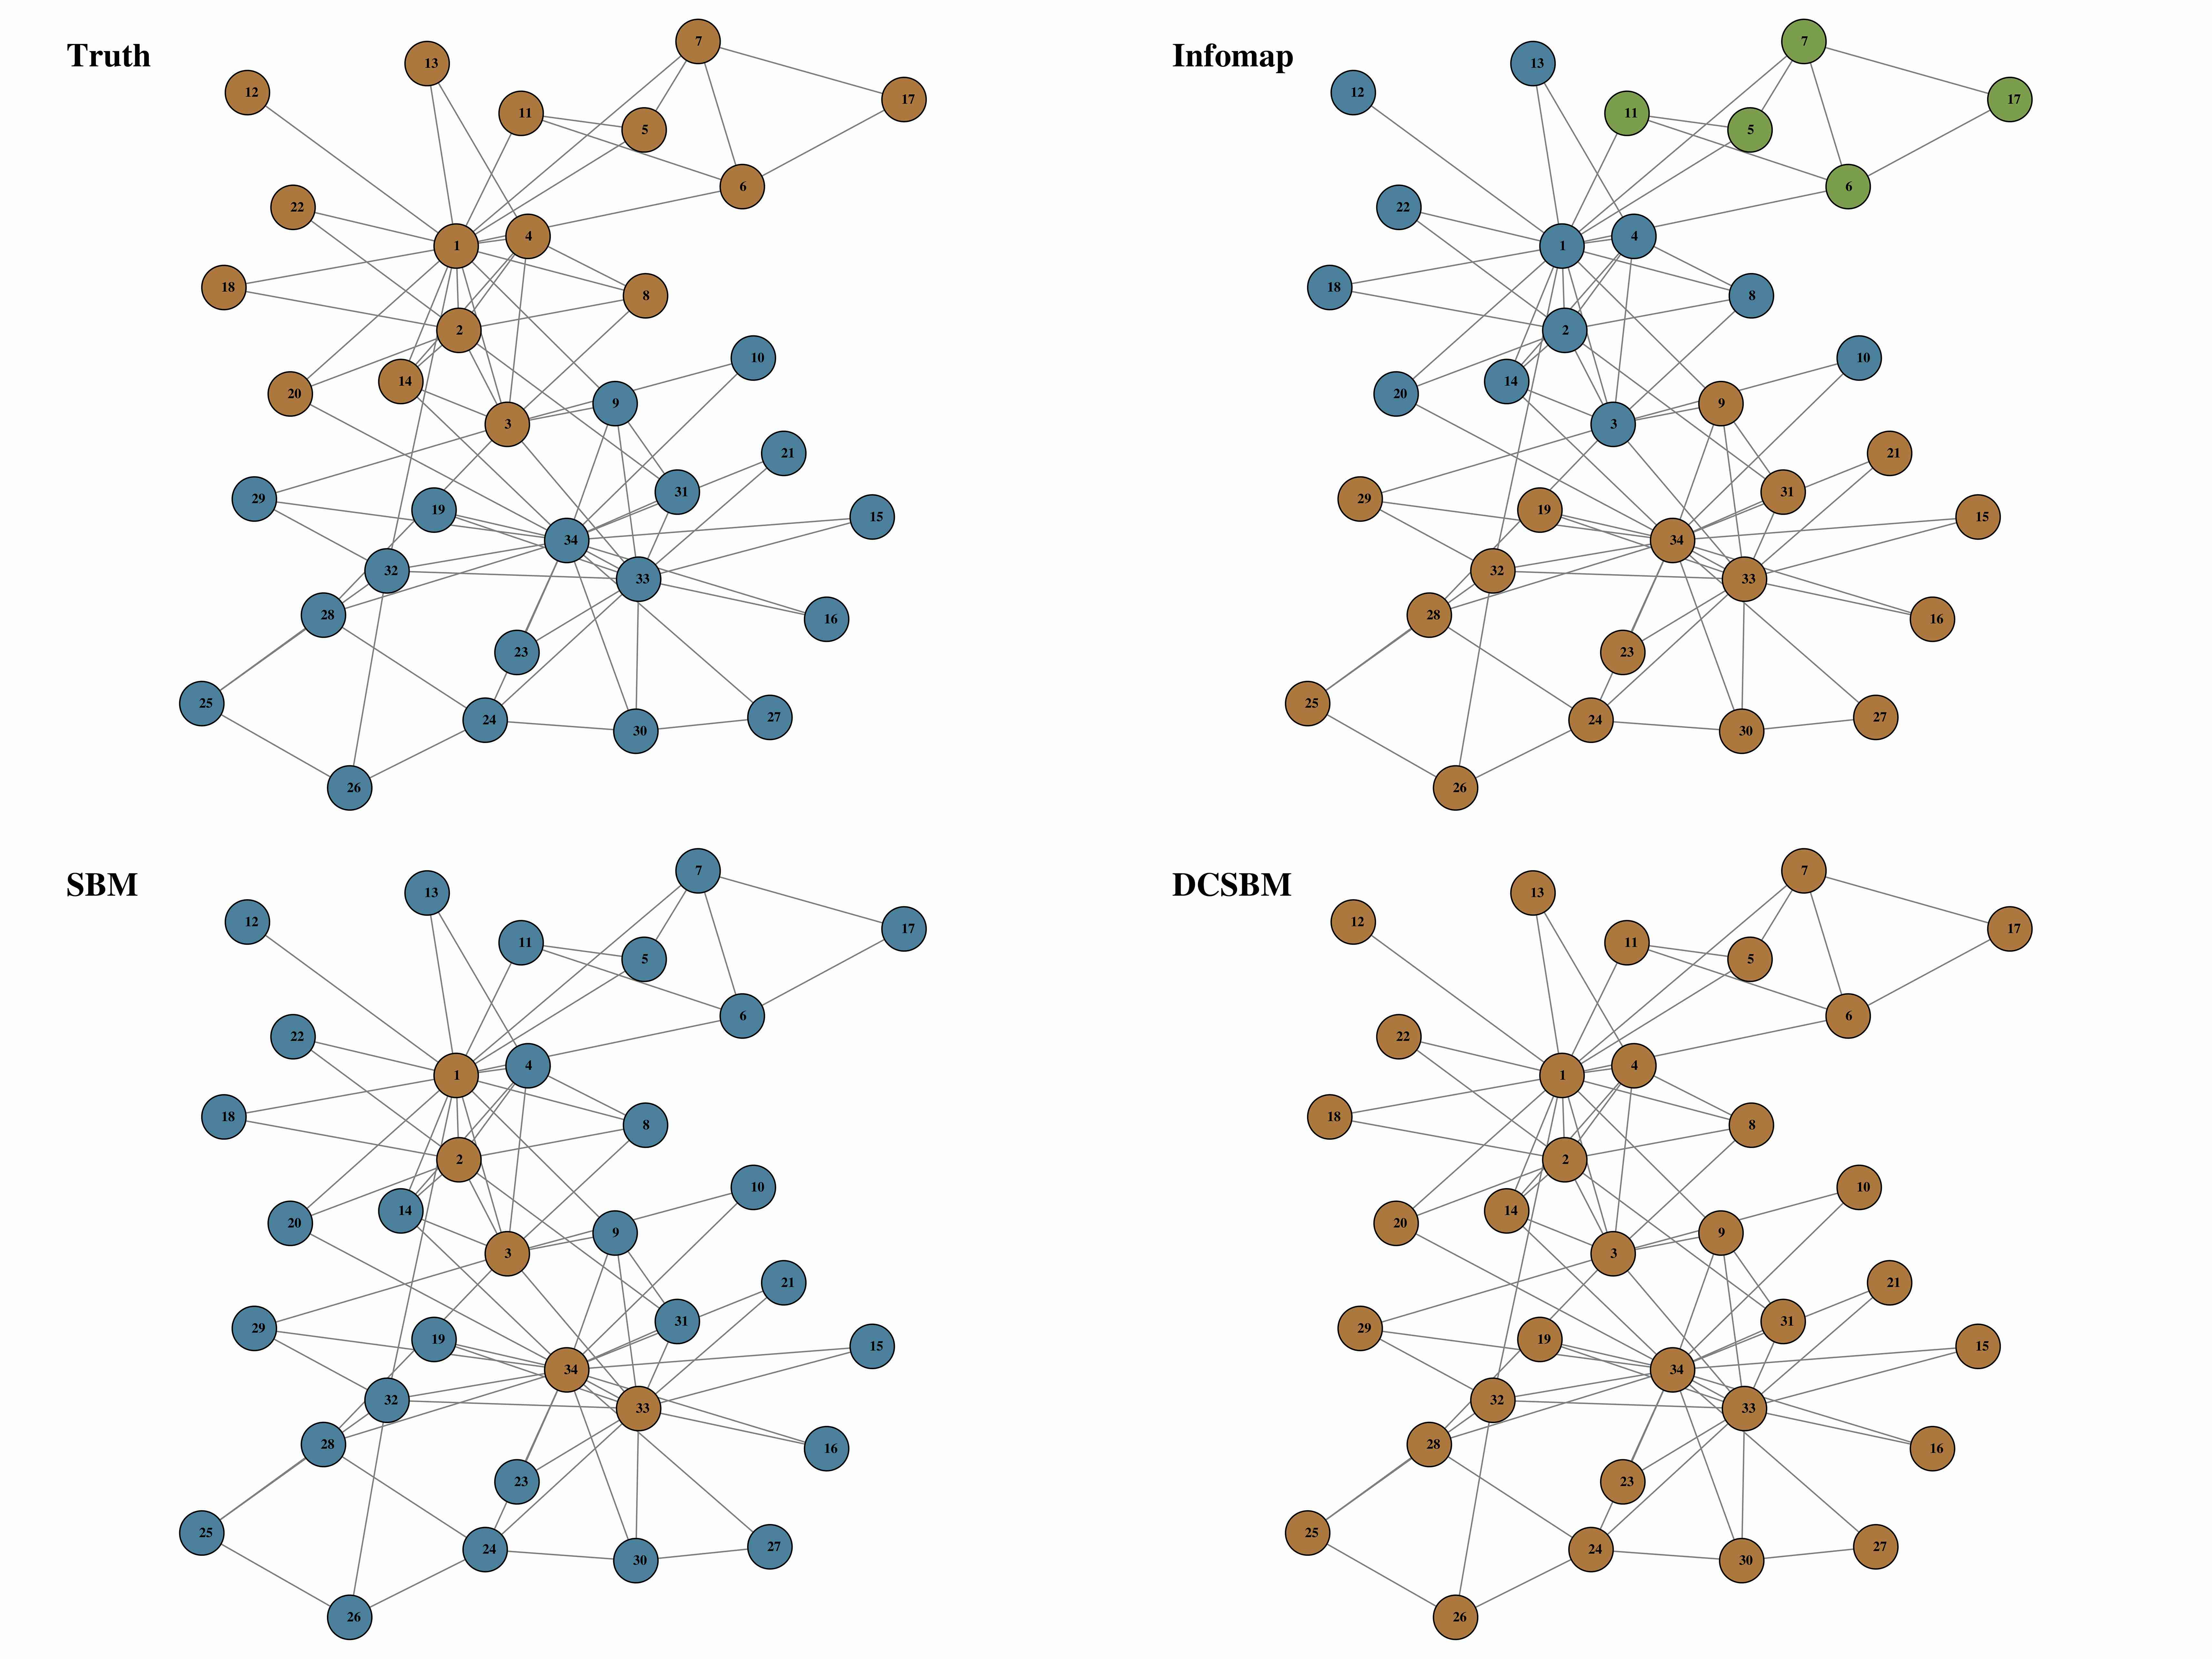

### `southern_women` detected communities

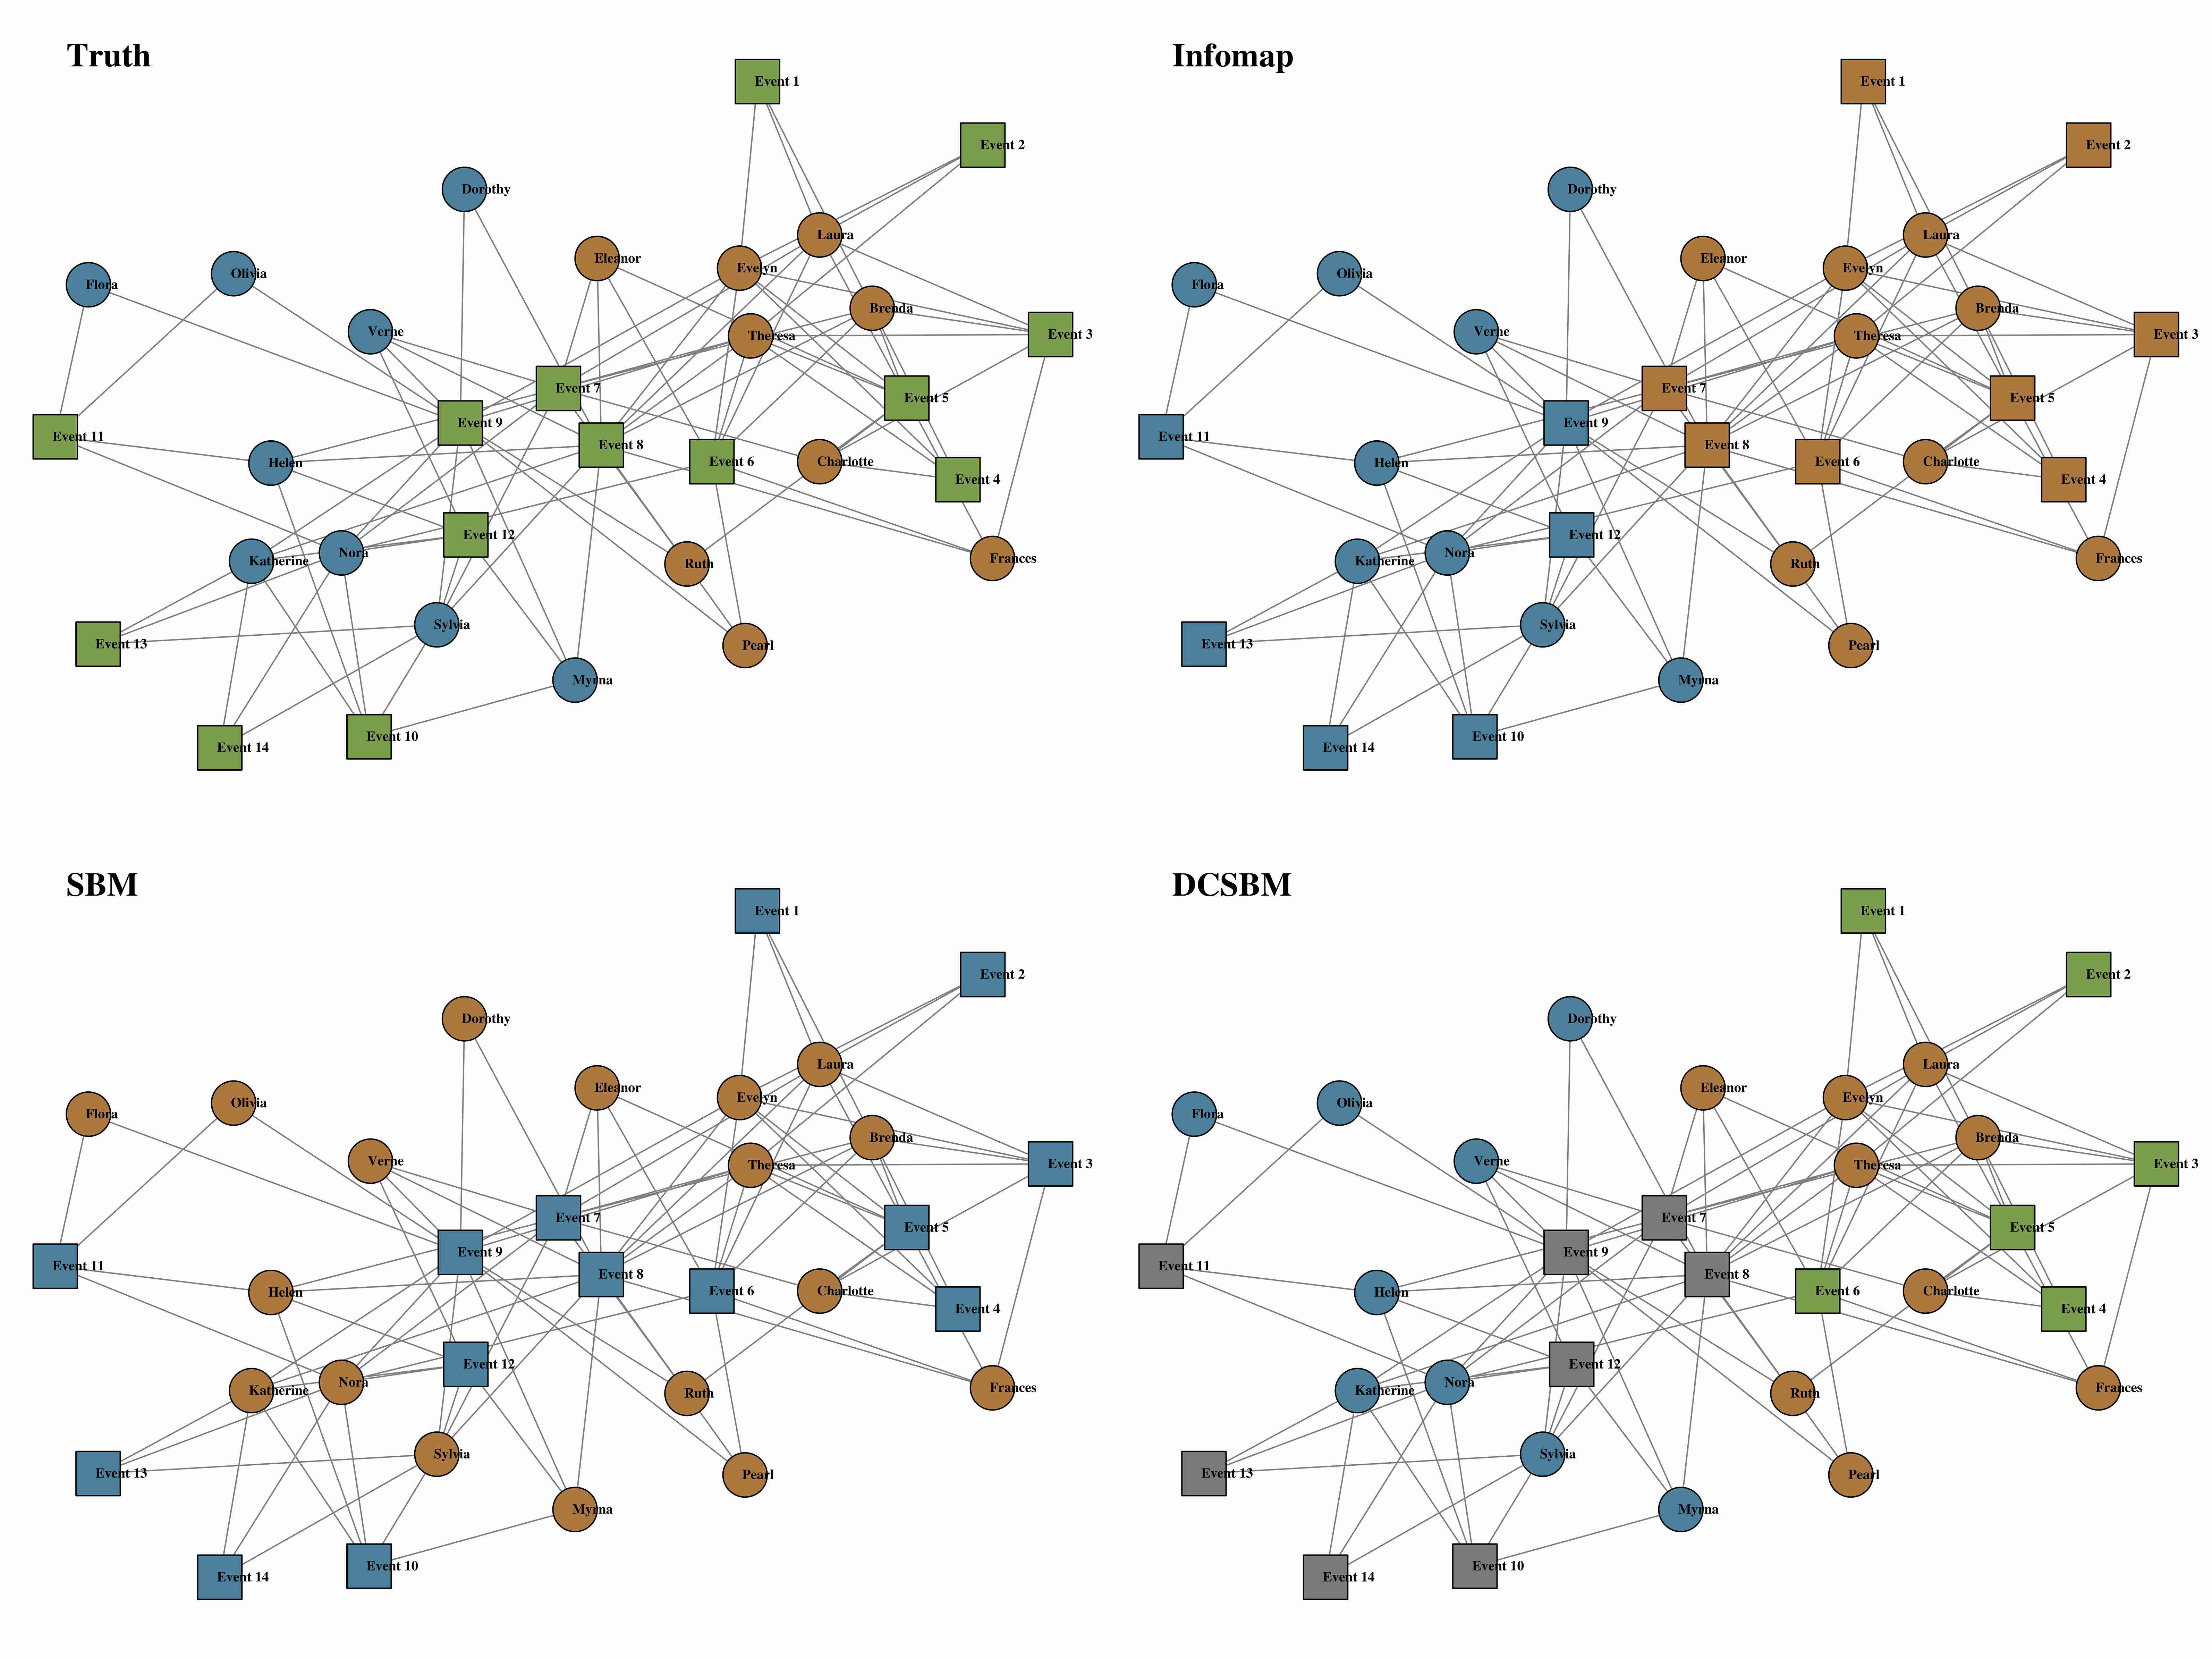